# Data Cleaning and Analysis

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
df=pd.read_csv("kc_house_data.csv")


#### Analyse de Forme :
- **variable target** : price
- **lignes et colonnes** :21613, 22
- **types de variables** : 
    - qualitatives : 
        - booléenne : waterfront
        - catégorielle : zipcode
    - quantitatives : 
        - continue : sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15
        - discrète : price, bedrooms, bathrooms, floors, view, condition, grade
    - temporelles : date, yr_built, yr_renovated
    - géographique : lat, long
- **Analyse des valeurs manquantes** :
    - pas de NaN

#### Analyse de Fond :
- **Visualisation de la target** :
    - mean     5.400881e+05
    - std      3.671272e+05
    - min      7.500000e+04
    - 25%      3.219500e+05
    - 50%      4.500000e+05
    - 75%      6.450000e+05
    - max      7.700000e+06 

In [4]:
df.shape

(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<Axes: >

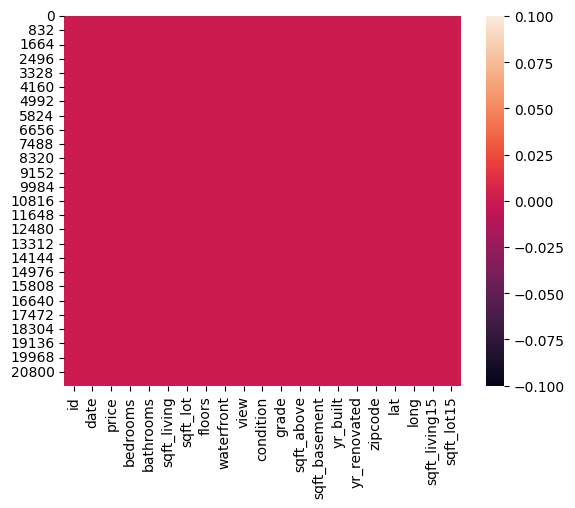

In [6]:
sns.heatmap(df.isna())   # 1 pour valeur manquante 0 sinon, donc valeur manquante en noir et sinon rouge

In [7]:
df.isna().sum()/df.shape[0]

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [8]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

## Nettoyage

In [9]:
print(df['id'].value_counts().loc[df['id'].value_counts() > 1])

df_occ=df.copy()

# Créer une colonne pour le nombre d'occurrences de chaque ID
df_occ['occurrences'] = df_occ.groupby('id')['id'].transform('count')

# Filtrer les lignes où le nombre d'occurrences est supérieur à 1
df_occ = df_occ[df_occ['occurrences'] > 1]

# Grouper les lignes par identifiant
grouped = df_occ.groupby('id')

# Compter le nombre de valeurs uniques dans chaque groupe pour chaque colonne
counts = grouped.nunique().drop(['price', 'date'], axis=1)

# Vérifier que toutes les colonnes ont exactement une valeur unique dans chaque groupe
all_cols_identical = (counts == 1).all().all()

if all_cols_identical:
    print("Toutes les colonnes sont identiques sauf pour 'price' et 'date'.")
else:
    print("Il y a des différences dans les autres colonnes en plus de 'price' et 'date'.")



795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
3630120700    2
4031000520    2
4302201085    2
2206700215    2
6021501535    2
Name: id, Length: 176, dtype: int64
Toutes les colonnes sont identiques sauf pour 'price' et 'date'.


On a donc des maisons qui ont été vendues plusieurs fois à des prix différents. On va garder uniquement le prix de la dernière vente.

In [10]:
# Trier le dataframe par identifiant et date dans l'ordre décroissant
df = df.sort_values(['id', 'date'], ascending=[True, False])

# Conserver uniquement la première occurrence de chaque identifiant
df = df.drop_duplicates(subset=['id'], keep='first')

print(df['id'].value_counts().loc[df['id'].value_counts() > 1])


Series([], Name: id, dtype: int64)


Maintenant, on peut supprimer les colonnes id et date du dataframe

In [11]:
df.drop(['id', 'date'], axis=1, inplace = True)

## Standardisation

In [12]:
df['basement']=df['sqft_basement'].apply(lambda x: 1 if x >0 else 0)
df['renovated']=df['yr_renovated'].apply(lambda x: 1 if x>0 else 0)

## Visualisation

In [23]:
# for col in df.select_dtypes("float" and "int") :
#    sns.scatterplot(df, y=df["price"], x=df[col])
#    plt.show()    

## Prix en fonction du nombre de pièces

Text(0.5, 0, 'Nombre de salle de bain')

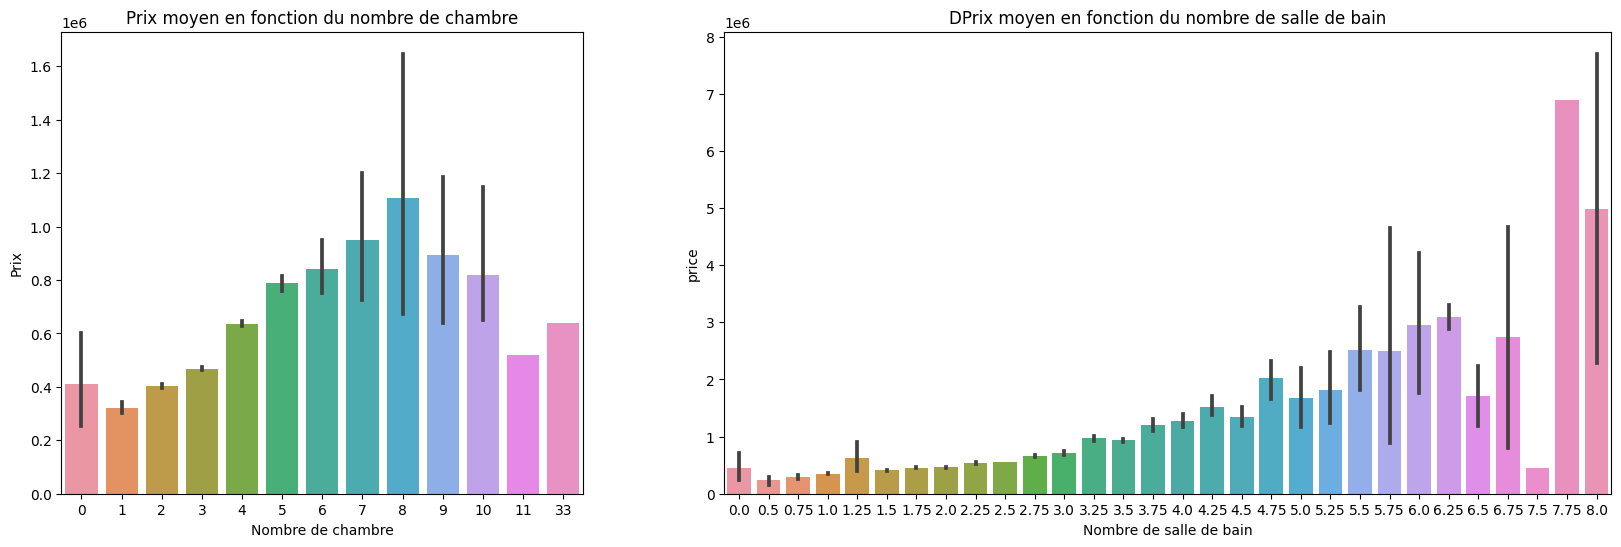

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1.7]})
f.set_size_inches(20, 6)

sns.barplot(x='bedrooms', y='price', data=df, estimator='mean', ax=ax1)
ax1.set_title("Prix moyen en fonction du nombre de chambre")
ax1.set_xlabel("Nombre de chambre")
ax1.set_ylabel("Prix")
sns.barplot(x='bathrooms', y='price', data=df, estimator='mean',ax=ax2)
ax2.set_title("DPrix moyen en fonction du nombre de salle de bain")
ax2.set_xlabel("Nombre de salle de bain")

## Prix en fonction de la localisation

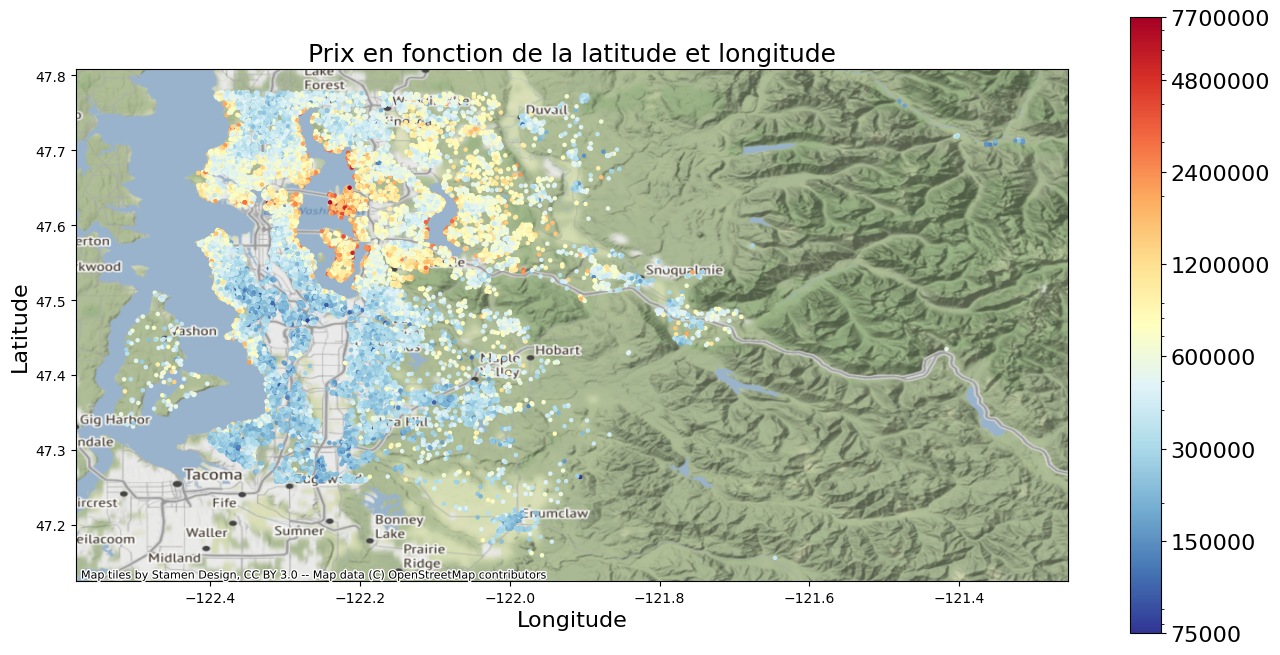

In [15]:
import matplotlib as mpl
import matplotlib.ticker as mticker
import contextily as ctx

fig, ax1 = plt.subplots()
fig.set_size_inches(16, 10)

# Define the colormap with reversed order and logarithmic normalization
cm = mpl.colormaps.get_cmap('RdYlBu')
cm = cm.reversed()
norm = mpl.colors.LogNorm(vmin=75000, vmax=7700000)

# Plot the scatter plot and add the colorbar
im = ax1.scatter(df['long'], df['lat'], c=df['price'], s=5, cmap=cm, norm=norm)
cbar = fig.colorbar(im, ax=ax1, shrink=0.8, aspect=20)
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([75000, 150000, 300000, 600000, 1200000, 2400000, 4800000, 7700000])
cbar.ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))

# Add the basemap using the contextily library
ctx.add_basemap(ax1, crs='EPSG:4326', source=ctx.providers.Stamen.Terrain, zoom=10)

ax1.set_title('Prix en fonction de la latitude et longitude', fontsize=18)
ax1.set_xlabel('Longitude', fontsize=16)
ax1.set_ylabel('Latitude', fontsize=16)


plt.savefig("fig.png")

In [16]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, ColumnDataSource
from bokeh.tile_providers import get_provider, CARTODBPOSITRON
from bokeh.palettes import Turbo256
from bokeh.transform import linear_cmap
from bokeh.layouts import row, column
from bokeh.models import ColorBar, NumeralTickFormatter

In [17]:
import numpy as np

df_map=pd.DataFrame()
df_map[['price', 'zipcode', 'lat', 'long']]=df[['price', 'zipcode', 'lat', 'long']]

# Define function to switch from lat/long to mercator coordinates
def x_coord(x, y):
    
    lat = x
    lon = y
    
    r_major = 6378137.000
    x = r_major * np.radians(lon)
    scale = x/lon
    y = 180.0/np.pi * np.log(np.tan(np.pi/4.0 + 
        lat * (np.pi/180.0)/2.0)) * scale
    return (x, y)# Define coord as tuple (lat,long)
df_map['coordinates'] = list(zip(df_map['lat'], df_map['long']))# Obtain list of mercator coordinates
mercators = [x_coord(x, y) for x, y in df_map['coordinates'] ]


# Create mercator column in our df
df_map['mercator'] = mercators# Split that column out into two separate columns - mercator_x and mercator_y
df_map[['mercator_x', 'mercator_y']] = df_map['mercator'].apply(pd.Series)

In [18]:
chosentile = get_provider(CARTODBPOSITRON)
palette = Turbo256
source = ColumnDataSource(data=df_map)
color_mapper = linear_cmap(field_name = 'price', palette = palette, low = df_map['price'].min(),high = df_map['price'].max())
tooltips = [("Price","@price"), ("Zipcode","@zipcode")]
p = figure(title = 'King County House Sales 2014–2015',
x_axis_type="mercator", y_axis_type="mercator", 
x_axis_label = 'Longitude', y_axis_label = 'Latitude', tooltips = tooltips)
p.add_tile(chosentile)
p.circle(x = 'mercator_x', y = 'mercator_y', color = color_mapper, source=source)
color_bar = ColorBar(color_mapper=color_mapper['transform'],formatter = NumeralTickFormatter(format="0,0"),
label_standoff = 13, width=8, location=(0,0))
p.add_layout(color_bar, 'right')
output_notebook()
show(p)

Loading BokehJS ...

## Prix en fonction de la surface

Text(0, 0.5, 'prix')

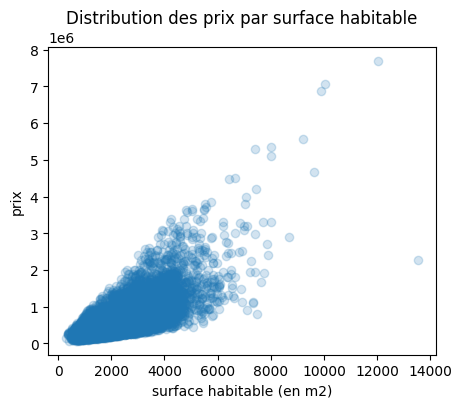

In [19]:
# On commence par instancier une figure et un axe.
# De manière optionnelle, on peut ici préciser sa taille
fig, ax = plt.subplots()
fig.set_size_inches(5,4)


# On définit ensuite le type de représentation souhaitée en fonction des données
ax.scatter(df["sqft_living"], df["price"], alpha = 0.2)

# On ajoute des titres à nos figures et à nos axes (optionnel mais conseillé)
ax.set_title("Distribution des prix par surface habitable")
ax.set_xlabel("surface habitable (en m2)")
ax.set_ylabel("prix")



In [20]:
gp_sqft=df.groupby(by='sqft_living')["price"].mean().reset_index("sqft_living")
gp_sqft


sqft_living      price
0             290   142000.0
1             370   276000.0
2             380   245000.0
3             384   265000.0
4             390   236500.0
...           ...        ...
1033         9640  4668000.0
1034         9890  6885000.0
1035        10040  7062500.0
1036        12050  7700000.0
1037        13540  2280000.0

[1038 rows x 2 columns]

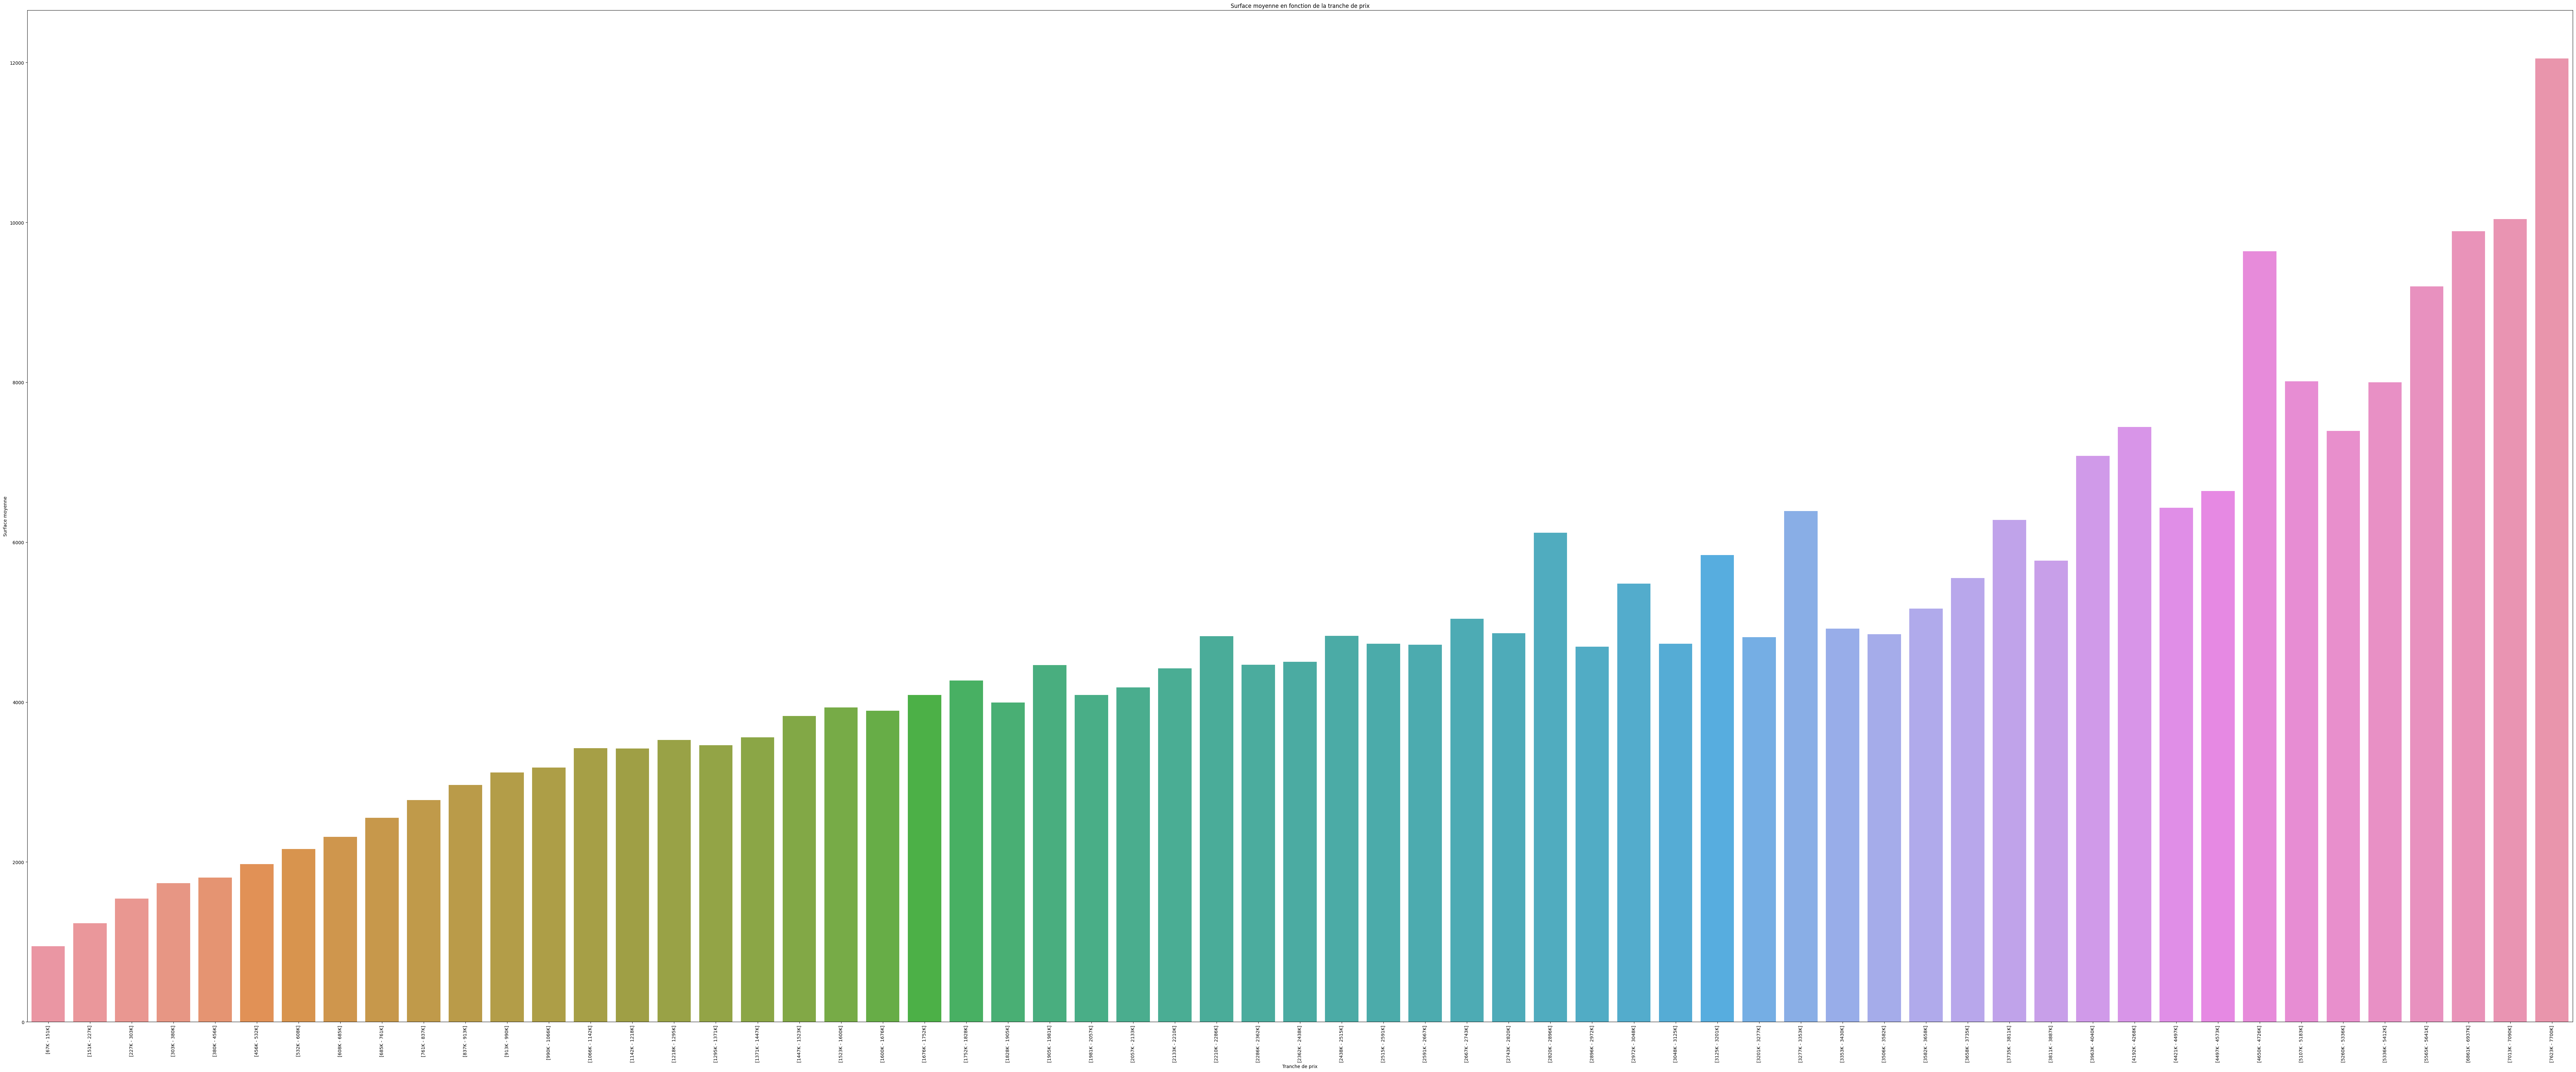

In [21]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots()
fig.set_size_inches(100,40)

# Générer les bins automatiquement en fonction des données de prix
bins = pd.cut(df['price'], bins=100)
labels = bins.apply(lambda x: f"[{int(x.left/1000)}K - {int(x.right/1000)}K]")

# Regrouper les données par tranche de prix et calculer la surface moyenne
grouped = df.groupby(labels)['sqft_living'].mean()
grouped = grouped.dropna()


# Créer un graphique à barres à partir des données groupées
sns.barplot(x=grouped.index.astype(str), y=grouped.values, ax=ax)

# Ajouter les étiquettes d'axe et le titre
ax.set(xlabel='Tranche de prix', ylabel='Surface moyenne',
       title='Surface moyenne en fonction de la tranche de prix')

#Rotation des labels de l'axe x
ax.tick_params(axis='x', labelrotation=90)

#Formattage de l'axe y pour afficher les valeurs en milliers de pieds carrés
# ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

## Prix en fonction de l'année de construction

NameError: name 'gb_year' is not defined

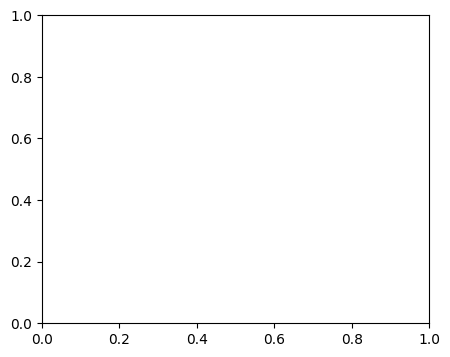

In [24]:
# On commence par instancier une figure et un axe.
# De manière optionnelle, on peut ici préciser sa taille
fig, ax = plt.subplots()
fig.set_size_inches(5,4)


# On définit ensuite le type de représentation souhaitée en fonction des données
ax.scatter(gb_year["yr_built"], gb_year["price"], alpha = 0.2)

# On ajoute des titres à nos figures et à nos axes (optionnel mais conseillé)
ax.set_title("Distribution des prix par année de construction")
ax.set_xlabel("année de construction")
ax.set_ylabel("prix")



## Matrice de corrélation entres les varaibles du dataset

<Axes: title={'center': 'variable correlation'}>

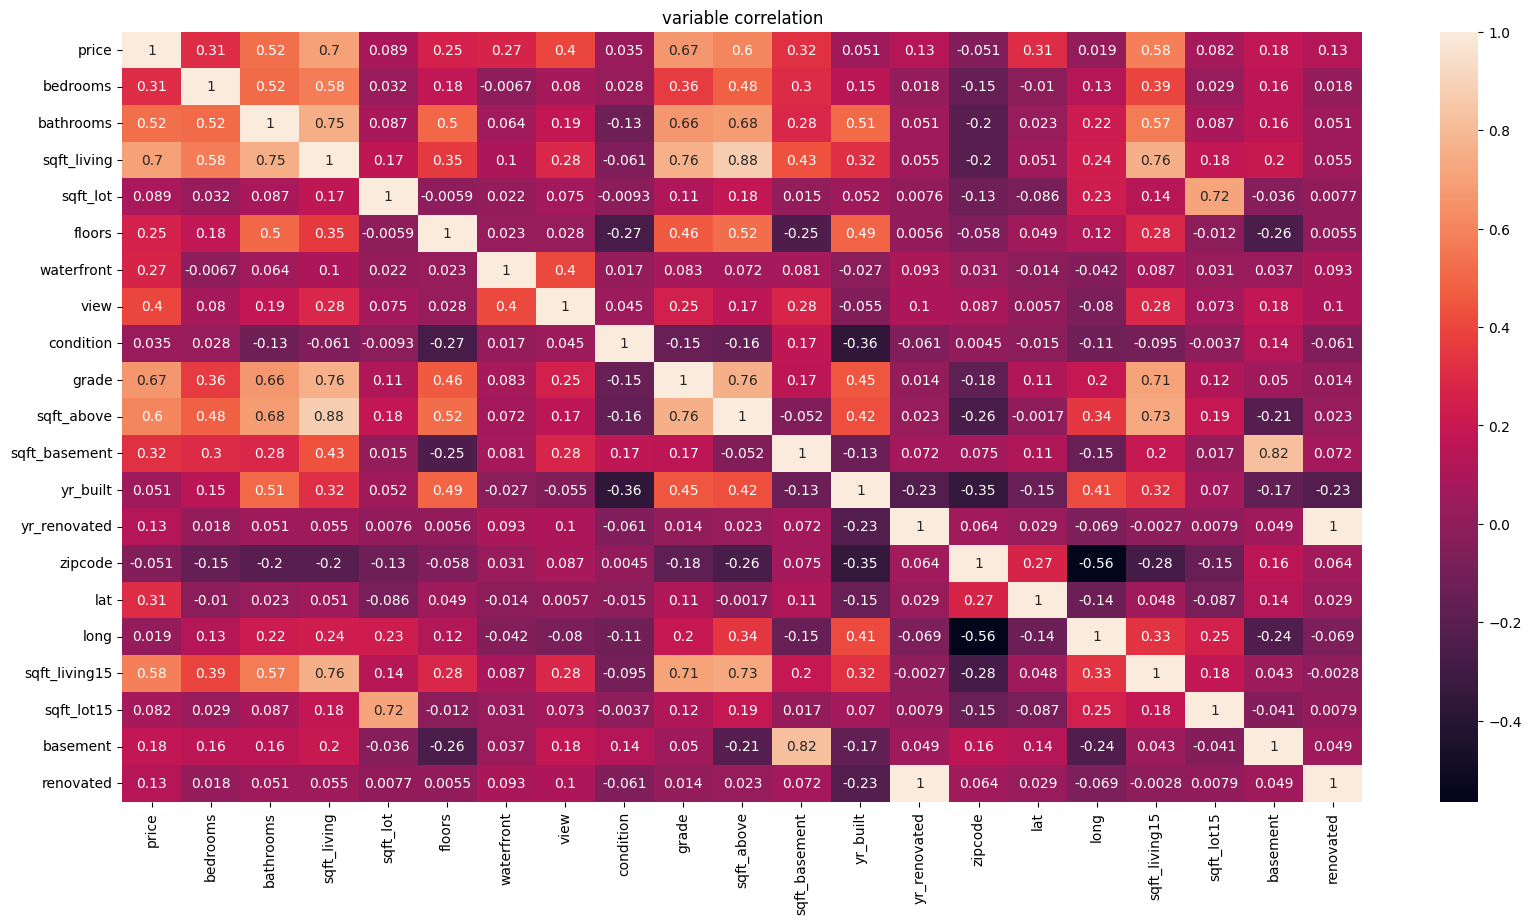

In [ ]:
corr= df

plt.figure(figsize=(20,10))
plt.title('variable correlation')
sns.heatmap(corr.astype(float).corr(), vmax=1.0, annot=True)


Les colonnes ajoutées, 'basement' et 'renovated' sont très peu corrélées au prix. On va donc les supprimer.

In [ ]:
df=df.drop("basement", axis=1)
df=df.drop("renovated", axis=1)
df.to_csv('kc_house_data_clean.csv', index = False) 